In [57]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from keras import layers, callbacks
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, precision_recall_fscore_support, classification_report, f1_score
import umap
import mygene
import gprofiler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier
import os
from matplotlib.backends.backend_pdf import PdfPages

In [58]:
#Mettre une seed pour la reproductibilité
tf.random.set_seed(555)

# **Load la matrice d'expression et les metadata**

In [59]:
X = pd.read_csv("../data/THCA_expression_matrix_final.csv", index_col=0)
X = X.T

In [60]:
X.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12


### ajout des metadata à la matrice d'expression

In [61]:
labels = pd.Index(X.index)   # index = patients

age = (
   labels
   .str.extract(r"AGE=(\d+)ANS")[0]
   .astype(float))

sex = (
   labels
   .str.extract(r"SEX=([a-zA-Z]+)")[0]
   .str.lower()
   .map({"male": 1, "female": 0}))

# ATTENTION !! Eviter d'utiliser les metadata suivantes dans X_full. 
# elles sont ajoutées seulement si on en a besoin pour un modèle

stage = (
    labels
    .str.extract(r"STAGE=([^_]+_[^_]+)")[0]) # ne pas ajouter à X_full

stage_map = {
    "Stade_I": 0,
    "Stade_II": 1,
    "Stade_III": 2,
    "Stade_IV": 3
} # ne pas ajouter à X_full
stage_enc = stage.map(stage_map)

mutation = (
    labels
    .str.extract(r"MUT=([^_]+)")[0]) # ne pas ajouter à X_full


X_full = X.copy()
#X_full["age"] = age.values
#X_full["sex"] = sex.values

X_full

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,4742,3,2172,1171,245,372,5861,3069,1740,2560,...,0,0,29,0,0,0,377,0,3,23
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,3753,4,1491,962,166,184,1663,2433,1244,1713,...,0,0,59,0,0,0,489,0,17,3
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4488,5,2061,1151,250,775,9620,2795,2425,2753,...,0,0,24,0,0,0,539,0,6,11
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,6131,6,2439,1213,242,1076,8511,3439,3132,2428,...,0,0,8,0,0,0,458,0,4,35


# **Définition de la cible qu'on cherche à prédire**

voir si on peut pas accumuler plusieurs prédictions par la suite

Choisissez la variable que vous voulez prédire en remplacant "choix" par le nom de la liste que vous voulez :

In [62]:
liste_des_prédictions = ["stade_tumoral", "type_tumoral", "mutation"]
choix = "mutation"

### _**préparation des inputs + labels du modèle**_

Pour prédire le stade tumoral on va prédire 1 état parmi 2 possibilités : 
- **0** : stade précoce (stade I et II)
- **1** : stade avancé (stade III et IV) 
c'est utile de regrouper les stades en 2 catégories car il y a peu de patients dans les stades III et IV, ca permet d'avoir un dataset plus équilibré pour l'entrainement du modèle.


ici, j'ai crée une fonction qui réuni les 3 prédictions qu'on voudrait faire. 
Pour chaque prédiction, la variable cible est identifiée (comme label)

| Nombre de classes | Format des labels | Activation finale | Loss |
|------------|------------|------------|------------|
| 2 classes (binaire)    | 0/1    | sigmoid    |binary_crossentropy    |
| ≥3 classes (entiers)   | 0,1,2...    | softmax    |sparse_categorical_crossentropy    |
| ≥3 classes (one-hot)     | [1,0,01, [0,1,0], ...]   | softmax    |categorical_crossentropy    |
| Valeurs continues    | floats  | aucune (ou linear)    |mse / mae    |

In [63]:
def build_task(choix, X):
    labels_index = pd.Index(X.index)
    X_out = X.copy()

    if choix == "stade_tumoral":
        # extraire le stade depuis le nom
        stade = pd.Series(stage.values, index=X_out.index)

        # garder uniquement les patients avec un stade défini
        # mask = stade != "Stage_NA"
        # X_out = X_out.loc[mask]
        # early vs late
        # labels = stade.loc[mask].isin(
        #     ["Stade_III", "Stade_IV"]
        # ).astype(int).values

        mask = stade.isin(["Stade_I", "Stade_II", "Stade_III", "Stade_IV"])

        X_out = X_out.loc[mask]
        stade = stade.loc[mask]

        stage_map = {"Stade_I": 0, "Stade_II": 1, "Stade_III": 2, "Stade_IV": 3}

        labels = stade.map(stage_map).values

        class_names = ["Stade_I", "Stade_II", "Stade_III", "Stade_IV"]
        n_classes = 4 # nombre de neurones de sortie
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"
        encoder = None
    
    elif choix == "type_tumoral":
        tumor_type = pd.Series(labels_index.str.extract(r"TYPE=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(tumor_type)
        
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    elif choix == "mutation":
        mutation = pd.Series(
            labels_index.str.extract(r"MUT=([^_]+)")[0].values,
            index=X_out.index
        )
        mask = mutation != "EIF1AX"

        X_out = X_out.loc[mask]
        mutation = mutation.loc[mask]

        encoder = LabelEncoder()
        labels = encoder.fit_transform(mutation)

        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"
        
    else:
        raise ValueError(
            "le choix doit etre 'stade_tumoral', 'type_tumoral' ou 'mutation'"
        )

    return X_out, labels, encoder, loss, class_names, n_classes, output_activation

X_out, labels, encoder, loss, class_names, n_classes, output_activation = build_task(choix, X_full)

In [64]:
print(f"les labels de {choix} : \n{labels}")

les labels de mutation : 
[0 1 0 1 0 0 0 0 0 0 2 0 1 0 1 1 2 0 1 0 0 0 1 0 1 2 0 2 2 0 0 0 1 1 0 1 0
 0 0 1 0 1 1 0 0 0 2 0 0 0 2 0 1 1 0 0 1 0 1 0 0 1 1 0 2 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 0 2 0 1 0 1 1 0 1 1 0 1 2 1 2 1 1 2 1 2 1 1 1 0 1 1 1 0 0 2 1 1
 1 0 1 0 0 1 1 0 0 2 1 0 1 0 1 2 1 1 1 0 2 1 2 0 0 1 1 0 1 0 1 0 0 1 1 1 0
 1 1 1 2 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 2 0 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 2 0 1 0 1 1 0 1 1 2 1 0 0 1 1
 0 2 1 0 1 0 1 1 2 0 1 0 0 1 0 1 0 0 1 0 2 0 0 0 2 1 0 2 2 0 1 1 0 0 1 0 1
 2 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 2 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1
 1 2 1 1 0 1 1 0 1 0 2 1 1 2 0 0 0 0 0 2 0 1 1 1 0 1 1 1 1 0 0 2 0 2 0 1 2
 2 0 0 0 0 2 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 2 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 2 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 2 1 1 0 0 2 1 0 1 1 0 1 1
 0 2 0 0 1 1 0 1 1 0 0 0 2 1 0 1 1 0 1 1 1 1 0 0 2 0 0 0 0 1 0 1 1 0 2 1 1
 1 1 0 1 1 0 0 1 0 2 2 1 1 0 1 0 2 1 0 0 0 1 1 0 1 1]


In [65]:
print(f"l'input de la matrice d'expression pour {choix} : \n{X_out}")

l'input de la matrice d'expression pour mutation : 
                                                    ENSG00000000003.15  \
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stad...                6156   
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stad...                7191   
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stad...                2219   
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stag...                5185   
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stad...                4466   
...                                                                ...   
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stad...                4742   
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_...                3753   
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stad...                4488   
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stad...                6131   
ID=TCGA-EL-A3ZS_AGE=22ANS_SEX=female_STAGE=Stad...                4097   

                                                    ENSG000

In [66]:
print(f"les classes qu'on veut prédire de {choix} sont : \n{class_names}")

les classes qu'on veut prédire de mutation sont : 
['BRAF', 'NO', 'RAS']


In [67]:
values, counts = np.unique(labels, return_counts=True)

for v, c in zip(values, counts):
    print(f"Classe {v} : {c}")

Classe 0 : 215
Classe 1 : 205
Classe 2 : 50


# **UMAP & PCA**

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


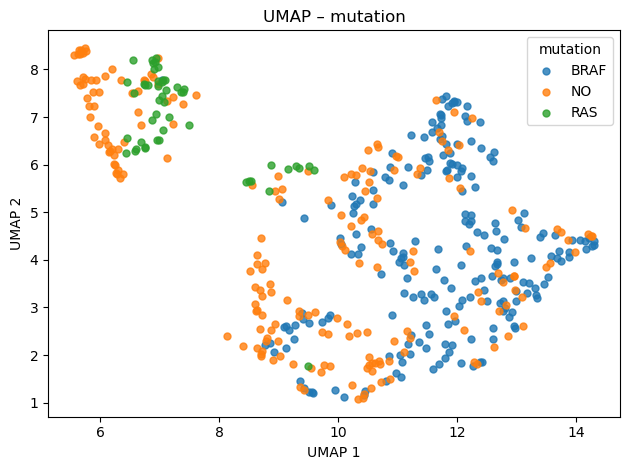

In [68]:
# standardization
X_log = np.log1p(X_out)

# UMAP 
frequences_umap = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42).fit_transform(X_log)

plt.figure()
for i, name in enumerate(class_names):
    mask = labels == i
    plt.scatter(frequences_umap[mask, 0], frequences_umap[mask, 1], label=name,s=25, alpha=0.8)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP – {choix}")
plt.legend(title=f"{choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/UMAP_{choix}.pdf")
plt.show()

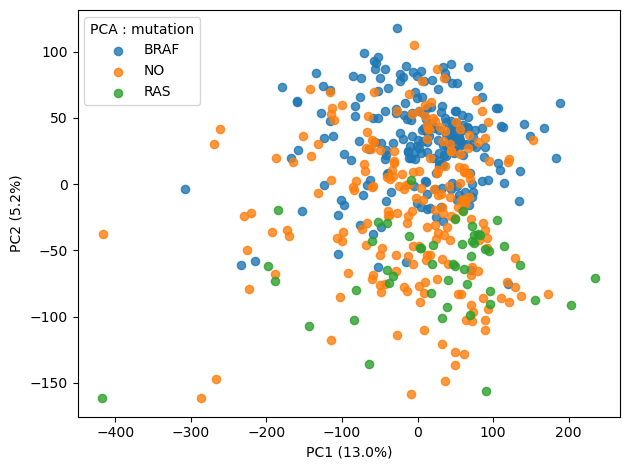

In [69]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_log))
df_pca = pd.DataFrame(X_pca, index=X_out.index, columns=["PC1", "PC2"])

# map les labels 
label_map = dict(enumerate(class_names))
df_pca["label"] = labels
df_pca["class_name"] = df_pca["label"].map(label_map)

# Plot
plt.figure()

for i, name in enumerate(class_names):
    subset = df_pca[df_pca["label"] == i]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=name,
        alpha=0.8,
        s=35)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title=f"PCA : {choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/PCA_{choix}.pdf")
plt.show()


# **Split les données train et test**

splitting

In [70]:
# Split train/validation/test par HVG
X_train, X_temp, y_train, y_temp = train_test_split(
    X_out, labels, test_size=0.4, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTailles des ensembles:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")



Tailles des ensembles:
Train: 282
Validation: 94
Test: 94


In [ ]:
#Preprocessing n°2, sélection par ANOVA des gènes les plus significatifs pour distinguer les classes
k_genes=50 #nombre de gènes conservés
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train, y_train)
mask = selector.get_support()

X_train = X_train.loc[:, mask]
X_val   = X_val.loc[:, mask]
X_test  = X_test.loc[:, mask]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [72]:
def print_class_distribution(y, name, class_names=None):
    counts = pd.Series(y).value_counts().sort_index()

    print(f"\n{name} set:")
    for cls, n in counts.items():
        if class_names is not None:
            print(f"  {class_names[cls]}: {n}")
        else:
            print(f"  Class {cls}: {n}")
            
print_class_distribution(y_train, "Train", class_names)
print_class_distribution(y_val,   "Validation", class_names)
print_class_distribution(y_test,  "Test", class_names)


Train set:
  BRAF: 129
  NO: 123
  RAS: 30

Validation set:
  BRAF: 43
  NO: 41
  RAS: 10

Test set:
  BRAF: 43
  NO: 41
  RAS: 10


In [73]:
# log transform
X_train_log = np.log1p(X_train)
X_test_log  = np.log1p(X_test)
X_val_log  = np.log1p(X_val)

# scaler (FIT SUR LE TRAIN UNIQUEMENT)
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_log)
X_test_final  = scaler.transform(X_test_log)
X_val_final  = scaler.transform(X_val_log)

In [74]:
# encode labels si nécessaire
# if labels.dtype == object:
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test  = label_encoder.transform(y_test)
#     n_classes = len(label_encoder.classes_)
# else:
#     n_classes = len(np.unique(y_train))

### Vérification des données avant entrainement

In [75]:
print("NaN par colonne (top 10):")
print(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False).head(10))
if sum(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False)) >0 : 
    print("ATTENTION : il y'a des NaN")

NaN par colonne (top 10):
0     0
37    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64


In [76]:
def sanity_checks(X, y, name=""):
    assert not np.isnan(X).any(), f"{name}: NaN in X"
    assert not np.isinf(X).any(), f"{name}: Inf in X"
    assert len(np.unique(y)) > 1, f"{name}: single class only"
    print(f"{name} OK")

sanity_checks(X_train_final, y_train, "TRAIN")
sanity_checks(X_val_final, y_val, "VAL")
sanity_checks(X_test_final, y_test, "TEST")

TRAIN OK
VAL OK
TEST OK


ici, il faut faire attention. Si une catégorie est en dessous de 5, on ne peut pas l'utiliser

In [77]:
for split, y in zip(
    ["train", "val", "test"],
    [y_train, y_val, y_test]
):
    print(split, np.bincount(y))

train [129 123  30]
val [43 41 10]
test [43 41 10]


# **Modèle dense à 3 couches**

trop de gènes par rapport au nombre de patients peut accroitre l'overfitting. On fait un modèle qui n'a que 3 couches


In [78]:
#def build_model(input_dim, n_classes, output_activation, loss):

    #learning_rate=1e-3 
    #l2_reg=1e-4
    #dropout_rate=0.2
    
    #inputs = keras.Input(shape=(input_dim,))

    # Backbone
    #x = keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(inputs)
    #x = keras.layers.Dropout(dropout_rate)(x)
    
    #x = keras.layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)

    # Output layer
    #outputs = keras.layers.Dense(n_classes, activation=output_activation)(x)

    #model = keras.Model(inputs=inputs, outputs=outputs)

    #model.compile(
    #    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    #    loss=loss,
    #    metrics=["accuracy"]
    #)

    #return model

In [79]:
#Version pour tester les différents hyperparamètres avec le tuner
def build_model_factory(input_dim, n_classes, output_activation, loss):
    def build_model(hp):
        """
        Construit et compile un réseau de neurones dense pour classification
        binaire ou multi-classe selon l'activation de sortie.
        """
        learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log", default=1e-3) 
        l2_reg=1e-4
        dropout_rate=hp.Float("dropout_rate", 0.1, 0.5, step=0.1, default=0.2)
        activation=hp.Choice("activation", ["relu", "tanh"], default="relu")
        
        inputs = keras.Input(shape=(input_dim,))

        # Backbone
        x = keras.layers.Dense(hp.Choice(f"units_first_layer", [32,64,128,256], default=128), activation=activation, kernel_regularizer=keras.regularizers.l2(l2_reg), name="hidden_layer_first")(inputs)
        use_dropout = hp.Boolean(f"dropout_first_layer", default=False)
        if use_dropout:
            x = keras.layers.Dropout(dropout_rate, name="dropout_first_layer")(x)
        
        
        num_layers = hp.Int("num_layers", 1, 3, default=1)

        for i in range(num_layers):
            x = keras.layers.Dense(
                hp.Choice(f"units_layer{i+2}", [32,64,128,256], default=128),
                activation=hp.Choice(f"activation_{i+2}", ["relu", "tanh"], default="relu"),
                kernel_regularizer=keras.regularizers.l2(l2_reg), name=f"hidden_layer_{i+2}"
            )(x)

            use_dropout = hp.Boolean(f"dropout_{i+2}", default=False)
            if use_dropout:
                x = keras.layers.Dropout(dropout_rate, name=f"dropout_layer_{i+2}")(x)
        # Output layer
        outputs = keras.layers.Dense(n_classes, activation=output_activation, name="output_layer")(x)

        model = keras.Model(inputs=inputs, outputs=outputs)

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss=loss,
            metrics=["accuracy"]
        )

        return model
    return build_model

In [80]:
# définition du modèle
#model = build_model(
#    input_dim=X_train_final.shape[1],
#    n_classes=n_classes,
#    output_activation=output_activation,
#    loss=loss
#)

# définition du early stop
#early_stop = keras.callbacks.EarlyStopping(
#    monitor="val_loss",
#    patience=15,
#    restore_best_weights=True
#)

In [81]:
#Définition du tuner
model_builder=build_model_factory(input_dim=X_train_final.shape[1], n_classes=n_classes, output_activation=output_activation, loss=loss)
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=200,
    seed=42,
    directory='../results/tuner_results',
    project_name=f'tuner_{choix}',
    overwrite=True  ##Seulement si on veut refaire la recherche d'hyperparamètres
)

In [82]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

In [ ]:
tuner.search(X_train_final, y_train, epochs=50, validation_data=(X_val_final, y_val), callbacks=[early_stop])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

In [ ]:
# Construction du modèle aavec les meilleurs hyper paramètres
model = tuner.hypermodel.build(best_hps)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_first (Dense)      │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,275 (212.01 KB)

 Trainable params: 54,275 (212.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_final, y_train)
dummy.score(X_test_final, y_test)


0.4574468085106383

# **Training**

In [ ]:
training_history = model.fit(
    X_train_final,
    y_train,
    validation_data=(X_val_final, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5603 - loss: 0.9435 - val_accuracy: 0.6277 - val_loss: 0.8512
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6844 - loss: 0.7334 - val_accuracy: 0.6596 - val_loss: 0.7510
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7447 - loss: 0.6355 - val_accuracy: 0.6915 - val_loss: 0.7107
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7766 - loss: 0.5832 - val_accuracy: 0.7128 - val_loss: 0.6968
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8050 - loss: 0.5493 - val_accuracy: 0.6809 - val_loss: 0.6901
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8121 - loss: 0.5250 - val_accuracy: 0.6809 - val_loss: 0.6867
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8085 - loss: 0.5048 - val_accuracy: 0.6915 - val_loss: 0.6867
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8191 - loss: 0.4866 - val_accuracy: 0.6702 - val_loss: 0.6890

# **Evaluation**

## *Training evaluation*

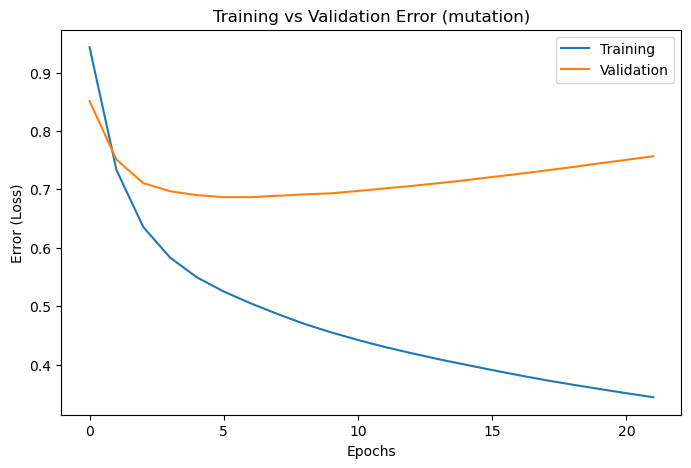

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'], label='Training')
plt.plot(training_history.history['val_loss'], label='Validation')
plt.title(f'Training vs Validation Error ({choix})')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

In [ ]:
def predict_classes(model, X, choix):
    probs = model.predict(X)

    # if choix == "stade_tumoral":
    #     # binaire
    #     preds = (probs.flatten() >= 0.5).astype(int)
    # else:
    #     # multi-classes
    preds = np.argmax(probs, axis=1)

    return probs, preds

In [ ]:
def evaluate_model(y_true, y_pred, class_names=None, title="Confusion matrix"):

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    # noms des classes
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print("Evaluation summary:")
    print(f" Accuracy:  {acc:.3f}")
    print(f" Precision (macro): {precision:.3f}")
    print(f" Recall (macro):    {recall:.3f}")
    print(f" F1-score (macro):  {f1:.3f}")
    print("\nDetailed classification report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return cm_df

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


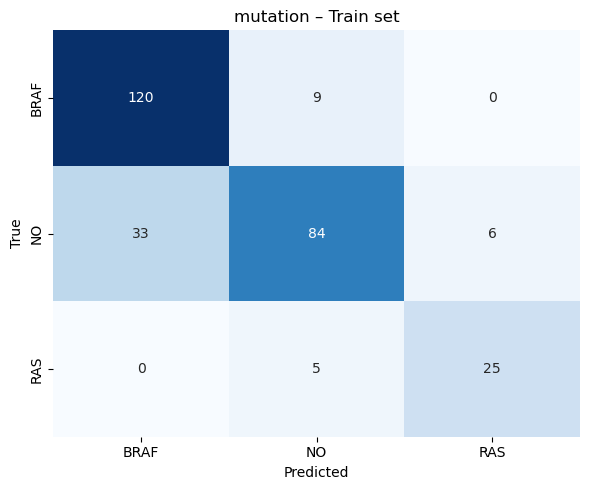

Evaluation summary:
 Accuracy:  0.812
 Precision (macro): 0.816
 Recall (macro):    0.815
 F1-score (macro):  0.810

Detailed classification report:

              precision    recall  f1-score   support

        BRAF       0.78      0.93      0.85       129
          NO       0.86      0.68      0.76       123
         RAS       0.81      0.83      0.82        30

    accuracy                           0.81       282
   macro avg       0.82      0.82      0.81       282
weighted avg       0.82      0.81      0.81       282



,BRAF,NO,RAS
BRAF,120,9,0
NO,33,84,6
RAS,0,5,25


In [ ]:
probs_train, y_train_pred = predict_classes(model, X_train_final, choix)

evaluate_model(
    y_train,
    y_train_pred,
    class_names=class_names,
    title=f"{choix} – Train set"
)

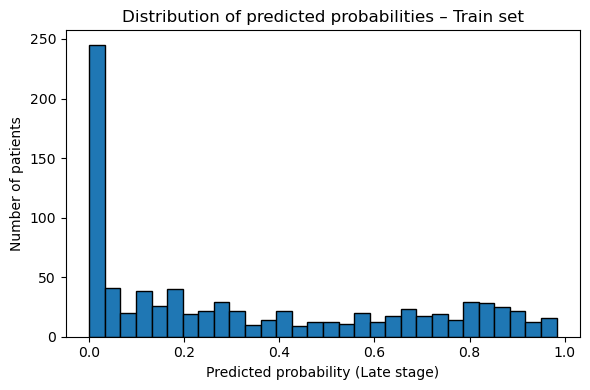

In [ ]:
probs = probs_train.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Train set")
plt.tight_layout()
plt.show()

In [ ]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_train, y_train_pred)

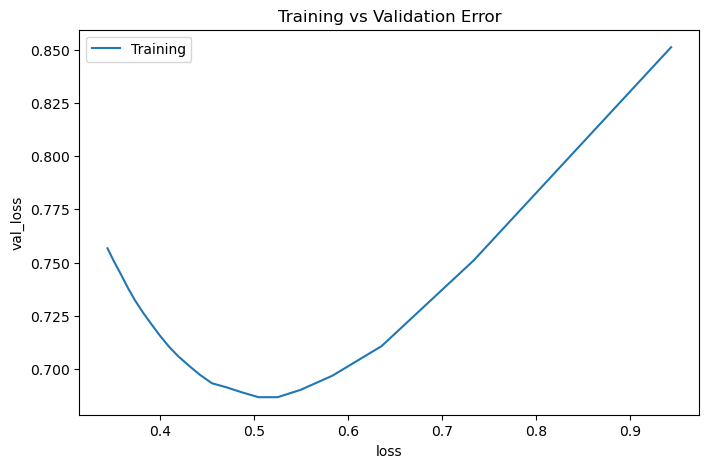

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'],training_history.history['val_loss'], label='Training')
# plt.plot(training_history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Error')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()

## *Test Evaluation*

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


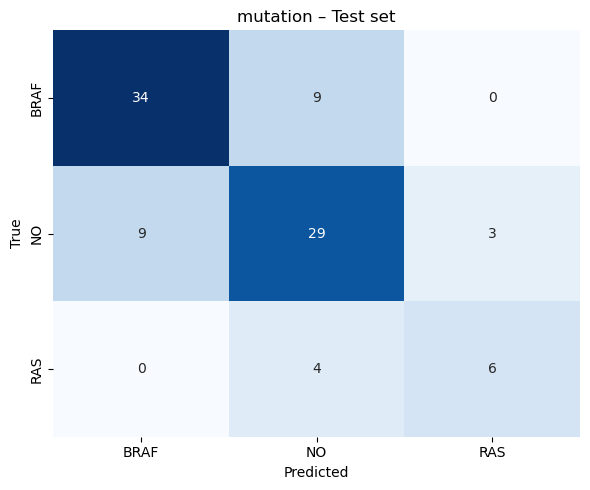

Evaluation summary:
 Accuracy:  0.734
 Precision (macro): 0.716
 Recall (macro):    0.699
 F1-score (macro):  0.707

Detailed classification report:

              precision    recall  f1-score   support

        BRAF       0.79      0.79      0.79        43
          NO       0.69      0.71      0.70        41
         RAS       0.67      0.60      0.63        10

    accuracy                           0.73        94
   macro avg       0.72      0.70      0.71        94
weighted avg       0.73      0.73      0.73        94



,BRAF,NO,RAS
BRAF,34,9,0
NO,9,29,3
RAS,0,4,6


In [ ]:
probs_test, y_test_pred  = predict_classes(model, X_test_final, choix)

evaluate_model(
    y_test,
    y_test_pred,
    class_names=class_names,
    title=f"{choix} – Test set"
)

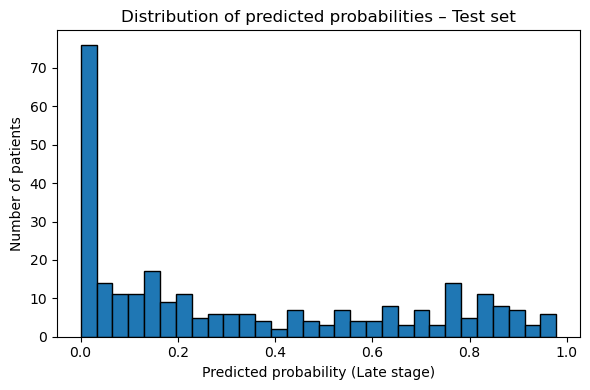

In [ ]:
probs = probs_test.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Test set")
plt.tight_layout()
plt.show()

In [ ]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_test, y_test_pred)

## *Cross Validation*

In [ ]:
def train_eval_one_fold(X, y, train_idx, test_idx, k_genes):

    X_train = X.iloc[train_idx]
    X_test  = X.iloc[test_idx]
    y_train = y[train_idx]
    y_test  = y[test_idx]

    # ----- ANOVA (FIT SUR TRAIN) -----
    selector = SelectKBest(f_classif, k=k_genes)
    selector.fit(X_train, y_train)

    mask = selector.get_support()
    X_train = X_train.loc[:, mask]
    X_test  = X_test.loc[:, mask]

    # ----- Scaling (FIT SUR TRAIN) -----
    X_train = np.log1p(X_train)
    X_test  = np.log1p(X_test)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)

    # ----- Model -----
    model = tuner.hypermodel.build(best_hps)
    

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    )

    model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=150,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # ----- Evaluation -----
    probs = model.predict(X_test, verbose=0)
    preds = np.argmax(probs, axis=1)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")

    return acc, f1

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
f1s = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_out, labels)):
    print(f"Fold {i+1}")

    acc, f1 = train_eval_one_fold(
        X_out, labels, train_idx, test_idx, k_genes
    )

    print(f"  Accuracy: {acc:.3f} | F1: {f1:.3f}")
    accs.append(acc)
    f1s.append(f1)

print("\n=== Cross-validation results ===")
print(f"Accuracy: {np.mean(accs):.3f} ± {np.std(accs):.3f}")
print(f"F1-score: {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")

Fold 1


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.830 | F1: 0.841
Fold 2


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.745 | F1: 0.730
Fold 3


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.702 | F1: 0.644
Fold 4


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.755 | F1: 0.731
Fold 5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.787 | F1: 0.737

=== Cross-validation results ===
Accuracy: 0.764 ± 0.043
F1-score: 0.737 ± 0.063


## *Enregistrer les résultats en pdf*

In [ ]:
def save_full_evaluation_pdf(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    class_names,
    history,
    choix,
    output_dir="../results"
):

    os.makedirs(output_dir, exist_ok=True)
    pdf_path = f"{output_dir}/evaluation_{choix}.pdf"

    def compute_metrics(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average="macro"
        )
        report = classification_report(
            y_true, y_pred, target_names=class_names
        )
        cm = confusion_matrix(y_true, y_pred)
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        return acc, precision, recall, f1, report, cm_df


    with PdfPages(pdf_path) as pdf:

        # ===== TRAIN =====
        acc, precision, recall, f1, report, cm_df = compute_metrics(
            y_train, y_train_pred
        )

        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix – TRAIN ({choix})")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        fig, ax = plt.subplots(figsize=(8, 10))
        ax.axis("off")
        ax.text(
            0.01, 0.98,
            f"TRAIN SET\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n",
            va="top",
            fontsize=11
        )
        ax.text(0.01, 0.60, report, va="top", family="monospace", fontsize=9)
        ax.set_title(f"Train evaluation – {choix}", fontsize=14)
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        # ===== TEST =====
        acc, precision, recall, f1, report, cm_df = compute_metrics(
            y_test, y_test_pred
        )

        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix – TEST ({choix})")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        fig, ax = plt.subplots(figsize=(8, 10))
        ax.axis("off")
        ax.text(
            0.01, 0.98,
            f"TEST SET\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n",
            va="top",
            fontsize=11
        )
        ax.text(0.01, 0.60, report, va="top", family="monospace", fontsize=9)
        ax.set_title(f"Test evaluation – {choix}", fontsize=14)
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        # ===== LEARNING CURVE =====
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(history.history["loss"], label="Train loss")
        ax.plot(history.history["val_loss"], label="Validation loss")
        ax.set_title(f"Training vs Validation loss – {choix}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

    print(f"PDF sauvegardé : {pdf_path}")

save_full_evaluation_pdf(
    y_train=y_train,
    y_train_pred=y_train_pred,
    y_test=y_test,
    y_test_pred=y_test_pred,
    class_names=class_names,
    history=training_history,
    choix=choix
)

PDF sauvegardé : ../results/evaluation_mutation.pdf


# **Feature Importance**

## *Construction des fonctions*

In [ ]:
def model_score_class(model, X, y, class_idx):
    probs = model.predict(X, verbose=0)
    preds = np.argmax(probs, axis=1)

    y_true_bin = (y == class_idx).astype(int)
    y_pred_bin = (preds == class_idx).astype(int)

    # F1 one-vs-rest pour la classe class_idx
    return f1_score(y_true_bin, y_pred_bin)

def permutation_importance_nn_class(model, X, y, class_idx, n_repeats=5, random_state=42):
    rng = np.random.RandomState(random_state)

    baseline = model_score_class(model, X, y, class_idx)
    print(f"Baseline F1 (class {class_idx}):", baseline)

    importances = np.zeros(X.shape[1])

    for j in range(X.shape[1]):
        scores = []
        X_perm = X.copy()

        for _ in range(n_repeats):
            perm_idx = rng.permutation(X.shape[0])
            X_perm[:, j] = X_perm[perm_idx, j]
            score = model_score_class(model, X_perm, y, class_idx)
            scores.append(baseline - score)

        importances[j] = np.mean(scores)

    return importances

## *Calcul de l'importance de chaque gène*

In [ ]:
all_fi = {}

for i, cname in enumerate(class_names):
    print("\nClass:", cname)
    imp = permutation_importance_nn_class(
        model,
        X_test_final,
        y_test,
        i,
        n_repeats=5
    )
    all_fi[cname] = imp


Class: BRAF
Baseline F1 (class 0): 0.7906976744186046

Class: NO
Baseline F1 (class 1): 0.6987951807228916

Class: RAS
Baseline F1 (class 2): 0.631578947368421


In [ ]:
selected_genes = X_test.columns.to_numpy()
fi_list = []

for cname, imp in all_fi.items():
    df = pd.DataFrame({
        "ensembl_id": selected_genes,
        "importance": imp,
        "class": cname
    })
    fi_list.append(df)

fi_class = pd.concat(fi_list, ignore_index=True)

fi_class["ensembl_clean"] = fi_class["ensembl_id"].str.replace(r"\.\d+$", "", regex=True)

## *Mapping ensembl_ID <--> vrais noms*

In [ ]:
mg = mygene.MyGeneInfo()

res = mg.querymany(
    fi_class["ensembl_clean"].unique().tolist(),
    scopes="ensembl.gene",
    fields="symbol",
    species="human",
    as_dataframe=True
)

annot = res[["symbol"]].reset_index()
annot.columns = ["ensembl_clean", "symbol"]

fi_class_annot = fi_class.merge(annot, on="ensembl_clean", how="left")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
2 input query terms found no hit:	['ENSG00000225742', 'ENSG00000226822']


In [ ]:
for cname in class_names:
    print("\nTop genes for", cname)
    top = (
        fi_class_annot[fi_class_annot["class"] == cname]
        .sort_values("importance", ascending=False)
        .head(10)
    )
    print(top[["symbol", "importance"]])


Top genes for BRAF
        symbol  importance
42      MBOAT2    0.012527
7        ERBB3    0.012446
51     SLC34A2    0.011449
98         NaN    0.009533
59      CYP2S1    0.006676
91  FAM111A-DT    0.005691
36       PDE5A    0.005691
20      TGFBR1    0.003964
13      TBC1D2    0.002945
6      ST3GAL6    0.002845

Top genes for NO
         symbol  importance
107       ERBB3    0.014476
171       PROS1    0.012695
159      CYP2S1    0.011360
193   LINC02568    0.009597
137        TMC6    0.009521
151     SLC34A2    0.006616
124       EVA1A    0.006347
145      GABRB2    0.005932
191  FAM111A-DT    0.004598
198         NaN    0.003574

Top genes for RAS
        symbol  importance
271      PROS1    0.031579
286   VAV3-AS1    0.030533
237       TMC6    0.018947
259     CYP2S1    0.018246
293  LINC02568    0.018246
224      EVA1A    0.012632
221       DTX4    0.012632
252       LAD1    0.012632
208       NGEF    0.011930
264    SLC35G1    0.006316


## *Résultats Feature Importance*

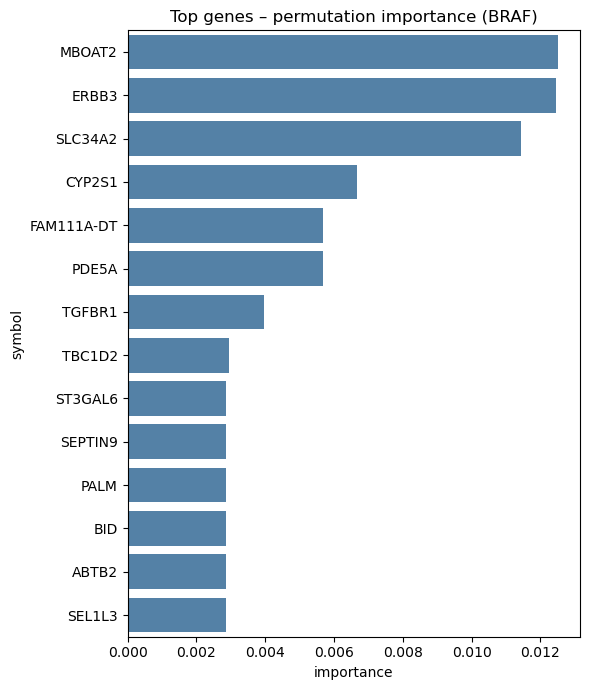

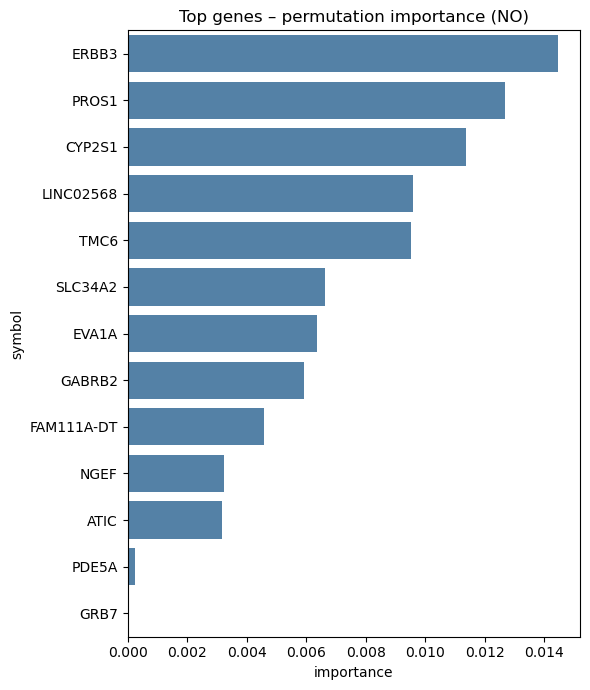

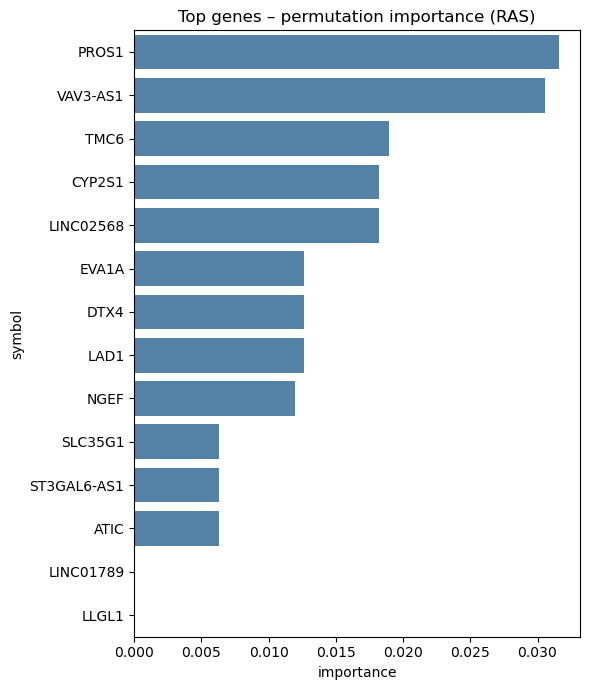

In [ ]:
for cname in class_names:
    dfp = (
        fi_class_annot[fi_class_annot["class"] == cname]
        .sort_values("importance", ascending=False)
        .head(15)
    )

    plt.figure(figsize=(6,7))
    sns.barplot(data=dfp, x="importance", y="symbol", color="steelblue")
    plt.title(f"Top genes – permutation importance ({cname})")
    plt.tight_layout()
    plt.show()

## *Enrichissement fonction (GO + KEGG) des top gènes importants*

In [ ]:
topN = 100

genes_braf = (
    fi_class_annot[fi_class_annot["class"] == "BRAF"]
    .sort_values("importance", ascending=False)
    .head(topN)["symbol"]
    .dropna()
    .unique()
    .tolist()
)

genes_ras = (
    fi_class_annot[fi_class_annot["class"] == "RAS"]
    .sort_values("importance", ascending=False)
    .head(topN)["symbol"]
    .dropna()
    .unique()
    .tolist()
)
print("Nb gènes BRAF:", len(genes_braf))
print(genes_braf[:10])

print("Nb gènes RAS:", len(genes_ras))
print(genes_ras[:10])

Nb gènes BRAF: 90
['MBOAT2', 'ERBB3', 'SLC34A2', 'CYP2S1', 'FAM111A-DT', 'PDE5A', 'TGFBR1', 'TBC1D2', 'ST3GAL6', 'SEPTIN9']
Nb gènes RAS: 90
['PROS1', 'VAV3-AS1', 'TMC6', 'CYP2S1', 'LINC02568', 'EVA1A', 'DTX4', 'LAD1', 'NGEF', 'SLC35G1']


In [ ]:
gp = GProfiler(return_dataframe=True)
go_braf = gp.profile(
    organism="hsapiens",
    query=genes_braf,
    sources=["GO:BP", "GO:MF", "GO:CC"]
)

print(go_braf.head())

go_braf_sig = go_braf[go_braf["p_value"] < 0.05]
print("GO significatifs (BRAF):", go_braf_sig.shape[0])

go_braf_sig[["source", "name", "p_value", "intersection_size"]].head(10)

go_ras = gp.profile(
    organism="hsapiens",
    query=genes_ras,
    sources=["GO:BP", "GO:MF", "GO:CC"]
)

go_ras_sig = go_ras[go_ras["p_value"] < 0.05]

print("GO significatifs (RAS):", go_ras_sig.shape[0])
go_ras_sig[["source", "name", "p_value", "intersection_size"]].head(10)

NameError: name 'GProfiler' is not defined

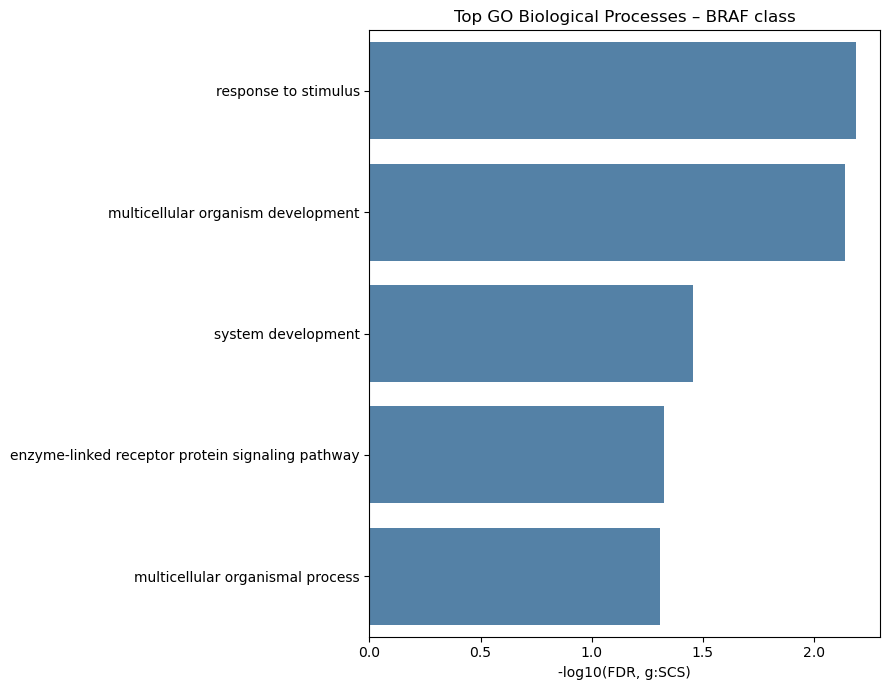

In [ ]:
bp = go_braf_sig[go_braf_sig["source"] == "GO:BP"].copy()
bp = bp.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(bp["p_value"]),
    y=bp["name"],
    color="steelblue"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top GO Biological Processes – BRAF class")
plt.tight_layout()
plt.show()

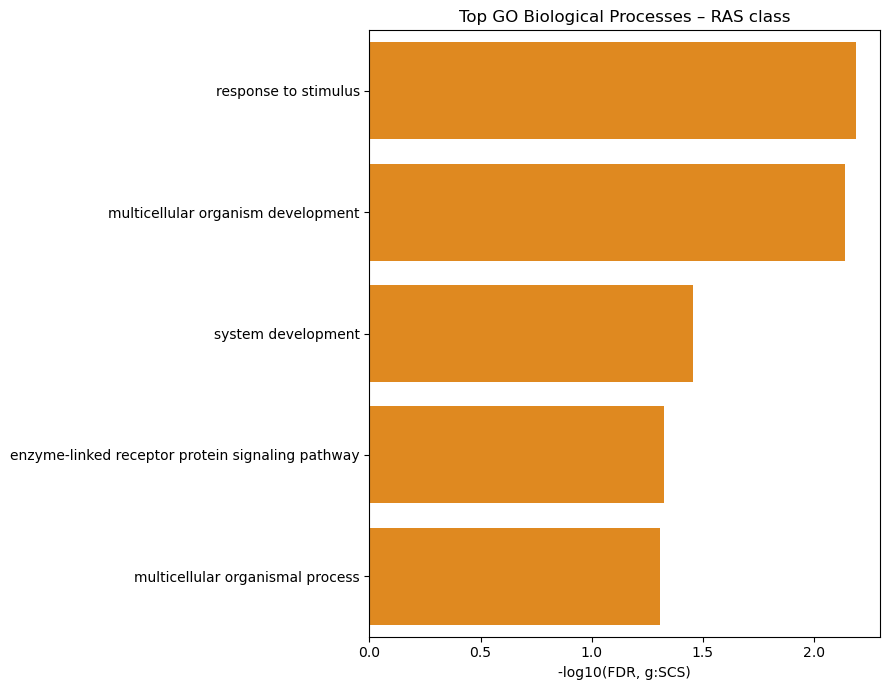

In [ ]:
bp_ras = go_ras_sig[go_ras_sig["source"] == "GO:BP"].copy()
bp_ras = bp_ras.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(bp_ras["p_value"]),
    y=bp_ras["name"],
    color="darkorange"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top GO Biological Processes – RAS class")
plt.tight_layout()
plt.show()

In [ ]:
kegg_braf = gp.profile(
    organism="hsapiens",
    query=genes_braf,
    sources=["KEGG"]
)

kegg_ras = gp.profile(
    organism="hsapiens",
    query=genes_ras,
    sources=["KEGG"]
)

kegg_ras_sig = kegg_ras[kegg_ras["p_value"] < 0.05]

print("KEGG significatifs (RAS):", kegg_ras_sig.shape[0])
kegg_ras_sig[["name", "p_value", "intersection_size"]].head(10)
kegg_braf_sig = kegg_braf[kegg_braf["p_value"] < 0.05]

print("KEGG significatifs (BRAF):", kegg_braf_sig.shape[0])
kegg_braf_sig[["name", "p_value", "intersection_size"]].head(10)

KEGG significatifs (RAS): 1
KEGG significatifs (BRAF): 1


,name,p_value,intersection_size
0,Adherens junction,0.01078,4


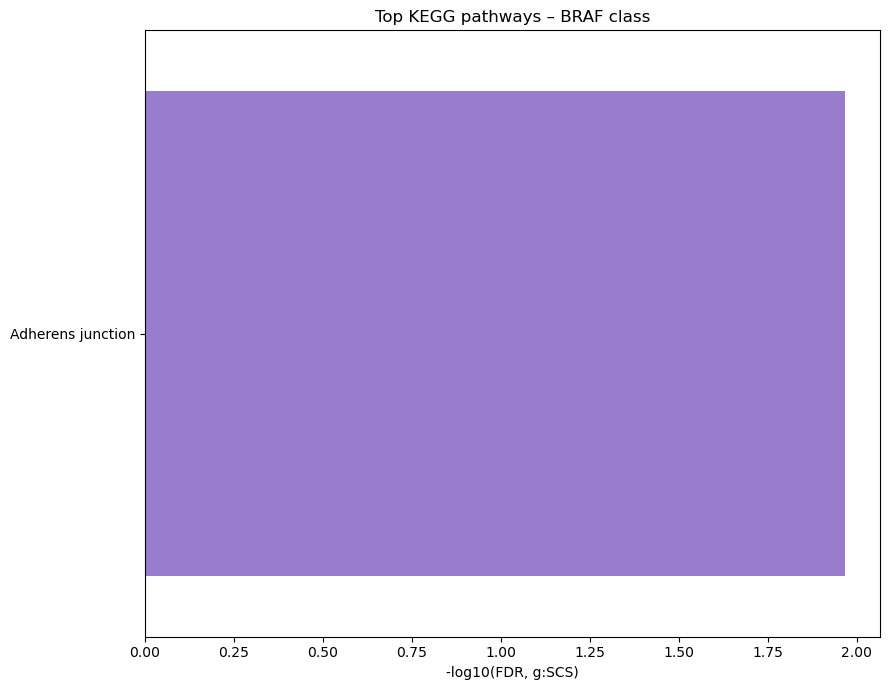

In [ ]:
kegg_plot = kegg_braf_sig.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(kegg_plot["p_value"]),
    y=kegg_plot["name"],
    color="mediumpurple"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top KEGG pathways – BRAF class")
plt.tight_layout()
plt.show()

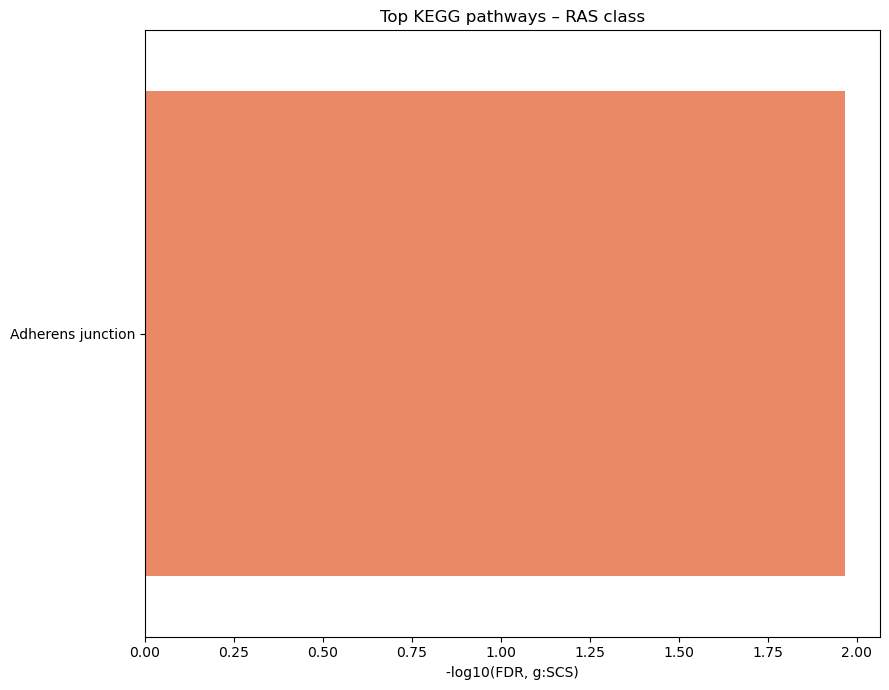

In [ ]:
kegg_plot_ras = kegg_ras_sig.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(kegg_plot_ras["p_value"]),
    y=kegg_plot_ras["name"],
    color="coral"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top KEGG pathways – RAS class")
plt.tight_layout()
plt.show()